In [1]:
import numpy as np
import scipy.stats as sp 
import pandas as pd 
import OutlierStatMethods.outlier_sum_stat_perm

## 0. Generate pseudo datasets for disease and controls 

In [2]:
np.random.seed(1234)
rng = np.random.default_rng()

In [5]:
disease_data = pd.DataFrame(rng.normal(2.0, 1, size=(100, 10000)))
control_data = pd.DataFrame(rng.normal(1.0, 1, size=(100, 10000)))

## 1. Initialize subclass and apply Outlier Stat Methods

In [6]:
OSPerm_cls = OutlierStatMethods.outlier_sum_stat_perm.OSPerm(disease_data=disease_data, control_data=control_data)

29/10//2023 10:55:1698600353 PM - DEBUG - OSPerm: Initialized OS Perm class
29/10//2023 10:55:1698600353 PM - DEBUG - OSPerm: Initialized OS Perm class


In [7]:
stats = OSPerm_cls.get_stats()

29/10//2023 10:55:1698600354 PM - INFO - OSPerm.get_stats: Calculating median, mad and applying mad normalization
29/10//2023 10:55:1698600354 PM - INFO - OSPerm.get_stats: Calculating median, mad and applying mad normalization
29/10//2023 10:55:1698600359 PM - INFO - OSPerm.get_stats: Generating null distribution
29/10//2023 10:55:1698600359 PM - INFO - OSPerm.get_stats: Generating null distribution
29/10//2023 11:06:1698600996 PM - INFO - OSPerm.get_stats: Consolidating stats into dictionary
29/10//2023 11:06:1698600996 PM - INFO - OSPerm.get_stats: Consolidating stats into dictionary
29/10//2023 11:06:1698600996 PM - INFO - OSPerm.get_stats: Finished applying outlier stat methods
29/10//2023 11:06:1698600996 PM - INFO - OSPerm.get_stats: Finished applying outlier stat methods


## 2. Visualize and Interpret results

In [8]:
import seaborn as sns

## 2.1. Build equal sized chromosomes and color them categorically on manhattan plot

In [38]:
n_chroms = 23
feat_size = 10000
lis = list(np.arange(0, feat_size, 1))
n = int(round(feat_size/n_chroms, 1))
x = {'chr' + str(int(i/430)): lis[i:i + n] for i in range(0, len(lis), n)}

long_format_chrom_df = pd.concat({k: pd.Series(v) for k, v in x.items()}).reset_index()
long_format_chrom_df.columns = ['chromosome', 'level_1', 'feature_number']

In [43]:
stats_with_chrom_number = long_format_chrom_df.copy()
stats_with_chrom_number['log_pvalue'] = -np.log10(stats['pvalues'])
stats_with_chrom_number['OutlierSum'] = stats['OutlierSum']

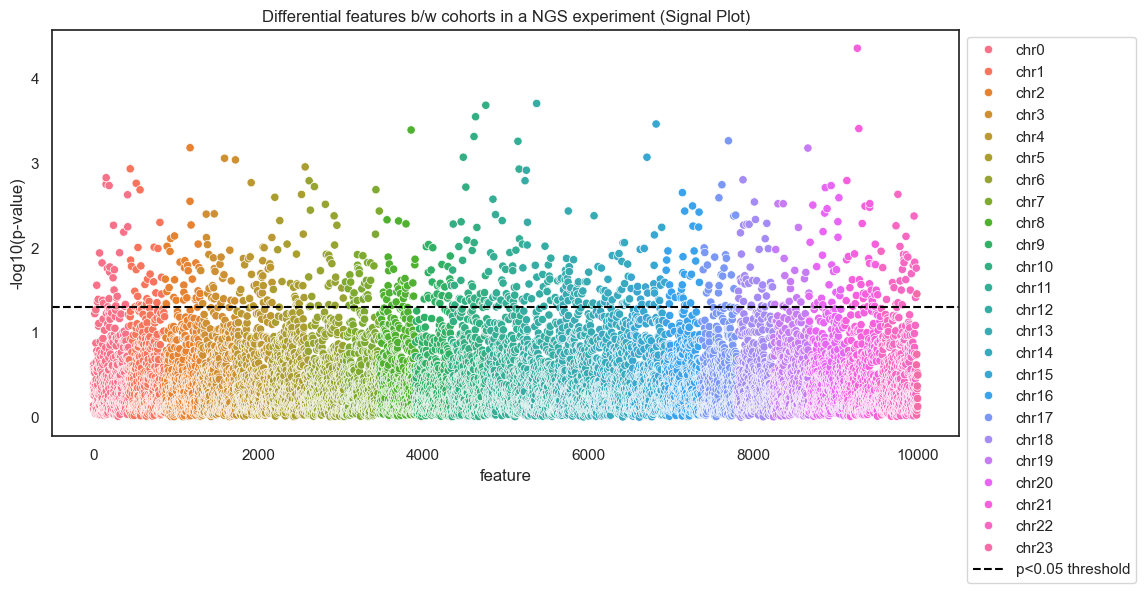

In [42]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.set_style('white')
# locs = np.arange(0, OSPerm_cls.no_of_feats,1)
# y_vals = -np.log10(stats['pvalues'])
ax = sns.scatterplot(data=stats_with_chrom_number, x='feature_number', y='log_pvalue', hue='chromosome')
ax.axhline(-np.log10(0.05), linestyle='--', color='black', label='p<0.05 threshold')
ax.set_xlabel('feature')
ax.set_ylabel('-log10(p-value)')
ax.set_title('Differential features b/w cohorts in a NGS experiment (Signal Plot)')
ax.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

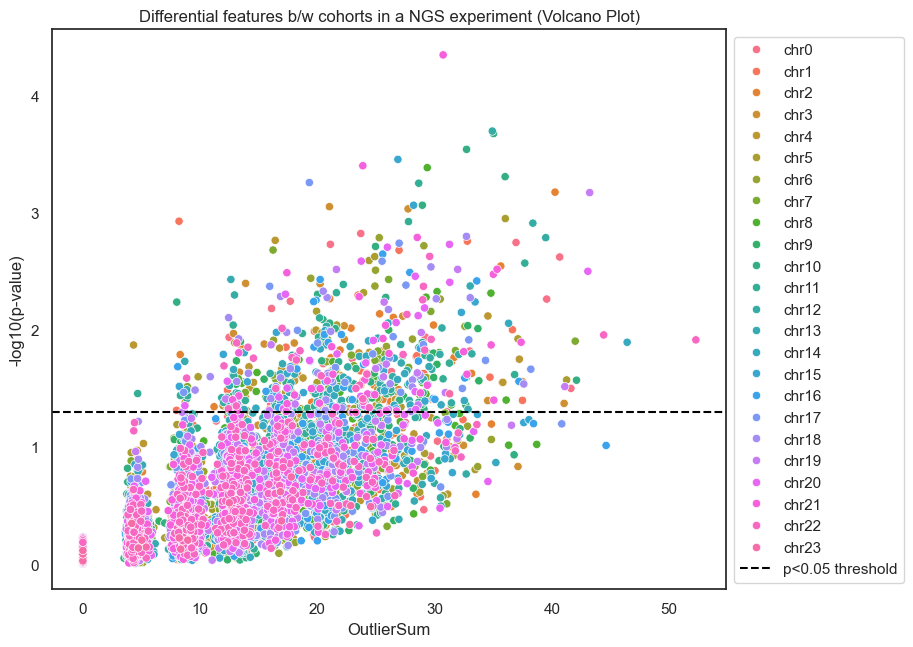

In [45]:
sns.set(rc={'figure.figsize':(8.7,7.27)})
sns.set_style('white')
x_vals = stats['OutlierSum']
y_vals = -np.log10(stats['pvalues'])
ax = sns.scatterplot(data=stats_with_chrom_number, x='OutlierSum', y='log_pvalue', hue='chromosome')
ax.axhline(-np.log10(0.05), linestyle='--', color='black', label='p<0.05 threshold')
ax.set_xlabel('OutlierSum')
ax.set_ylabel('-log10(p-value)')
ax.set_title('Differential features b/w cohorts in a NGS experiment (Volcano Plot)')
ax.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))